In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치        
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

ModuleNotFoundError: No module named 'plotly'

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [3]:
hospital= pd.read_csv('hospital.csv')

In [4]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      82 non-null     object
 1   합계      82 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [5]:
hospital.합계.mean()

147.109756097561

In [6]:
train=hospital[(hospital['날짜']>='2018-01-02')&(hospital['날짜']<='2018-03-30')]
test=hospital[(hospital['날짜']>='2018-04-02')&(hospital['날짜']<='2018-04-30')]

In [7]:
train['날짜']=train['날짜'].astype('str')
train['날짜']=pd.to_datetime(train['날짜'])
train.index=train['날짜']
train.set_index('날짜',inplace=True)

<ipython-input-7-6702f016779b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['날짜']=train['날짜'].astype('str')
<ipython-input-7-6702f016779b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['날짜']=pd.to_datetime(train['날짜'])


In [8]:
train

,합계
날짜,
2018-01-02,133
2018-01-03,97
2018-01-04,72
2018-01-05,112
2018-01-08,109
...,...
2018-03-26,178
2018-03-27,126
2018-03-28,152


<AxesSubplot:xlabel='날짜'>

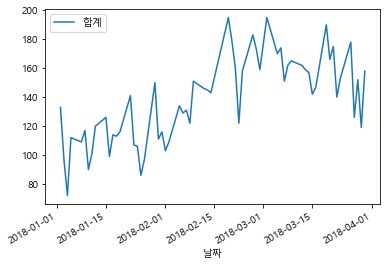

In [9]:
train.plot()

In [10]:
# AD-Fuller Test : 시계열의 정상성(stationary) 한지 확인

from statsmodels.tsa.stattools import adfuller

""" 차분 방법 """
train_diff =train - train.shift(1)
print(train)

y = train.dropna()
y1diff =train_diff.dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

             합계
날짜             
2018-01-02  133
2018-01-03   97
2018-01-04   72
2018-01-05  112
2018-01-08  109
...         ...
2018-03-26  178
2018-03-27  126
2018-03-28  152
2018-03-29  119
2018-03-30  158

[61 rows x 1 columns]
원 데이터 ADF Statistic: -1.418
원 데이터 p-value: 0.574
1차 차분 ADF Statistic: -7.589
1차 차분 p-value: 0.000


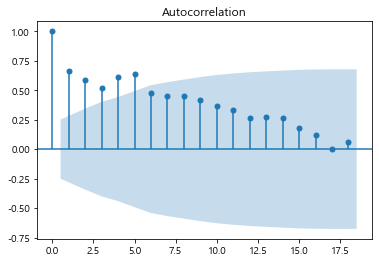

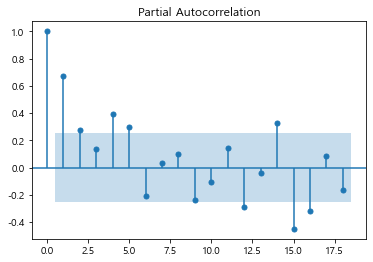

In [11]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

plot_acf(train)
plot_pacf(train)
plt.show()

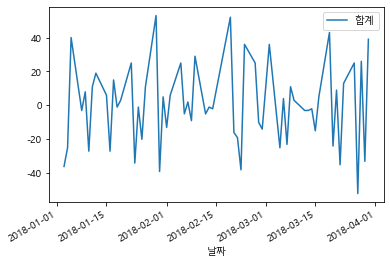

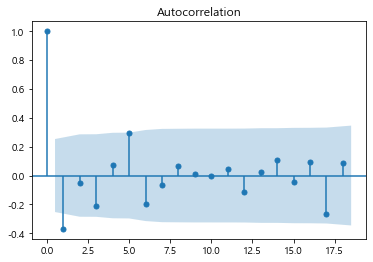

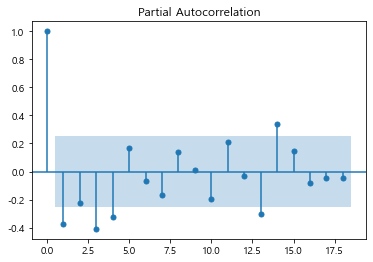

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
diff_1=train.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [21]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [22]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train.합계.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 588.6803294758306
(0, 0, 1) 570.7250268828441
(0, 0, 2) 554.7452328366106
(0, 0, 3) 556.3783762745882
(0, 0, 4) 558.3274445578987
(0, 1, 0) 555.7580339256128
(0, 1, 1) 535.538373434279
(0, 1, 2) 537.2604580235336
(0, 1, 3) 538.2434163780351
(0, 1, 4) 531.3199960860018
(0, 2, 0) 605.1836655030052
(0, 2, 1) 553.6280370680911
(0, 2, 2) 535.3870372643304
(0, 2, 3) 537.0064678240067
(0, 2, 4) 537.7354901064449
(1, 0, 0) 555.6134088788642
(1, 0, 1) 546.5736812042928
(1, 0, 2) 548.4223475542724
(1, 0, 3) 548.9974156774529
(1, 0, 4) 541.0693796699622
(1, 1, 0) 548.2520022858275
(1, 1, 1) 537.3313606633109
(1, 1, 2) 539.2100703275632
(1, 1, 3) 538.5990389497977
(1, 1, 4) 532.8805559933901
(1, 2, 0) 579.1038541951334
(1, 2, 1) 546.9459563754151
(1, 2, 2) 537.2273243586615
(1, 2, 4) 541.3115995099475
(2, 0, 0) 553.4713664825363
(2, 0, 1) 548.463156658303
(2, 0, 2) 550.3741752551875
(2, 0, 3) 548.2947146561116
(2, 1, 0) 546.6201229016599
(2, 1, 1) 538.3704503639012
(2, 1, 2) 537.83267959

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=2,차분=1, ma=3)파라미터로 arima모델을 학습
model=ARIMA(train['합계'], order=(2,1,4))
model_fit=model.fit(trend='c',full_output=True,disp=1)
print(model_fit.summary())

C:\Users\areum\conda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\areum\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

                             ARIMA Model Results                              
Dep. Variable:                   D.합계   No. Observations:                   60
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -255.656
Method:                       css-mle   S.D. of innovations             16.288
Date:                Thu, 11 Nov 2021   AIC                            527.312
Time:                        14:53:45   BIC                            544.066
Sample:                             1   HQIC                           533.865
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5902      0.834      0.708      0.479      -1.044       2.225
ar.L1.D.합계    -0.0570      0.152     -0.374      0.709      -0.356       0.242
ar.L2.D.합계    -0.5699      0.141     -4.047      0.0

C:\Users\areum\conda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:xlabel='날짜'>

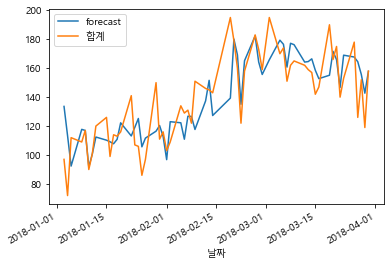

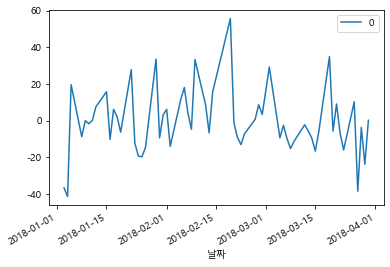

In [14]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [15]:
forecast_data=model_fit.forecast(steps=21) 

pred_y=forecast_data[0].tolist()

In [31]:
pred_y

[144.70835078651342,
 144.43249138319342,
 141.0556950493414,
 142.48364107904428,
 145.2868577697421,
 145.27364010913425,
 144.63715271271295,
 145.6411780282726,
 146.90692386508283,
 147.22287858300314,
 147.44379758723676,
 148.21138925860967,
 149.00199415745726,
 149.47975510745545,
 149.96222473422318,
 150.62270676347066,
 151.27036378911689,
 151.81730738817913,
 152.3772973967883,
 152.99393778089836,
 153.599915928723]

In [33]:
test.index=test['날짜']
test.set_index('날짜',inplace=True)

In [34]:
forecast_data=model_fit.forecast(steps=21) 

pred_y=forecast_data[0].tolist()
test_y=test.합계.values 

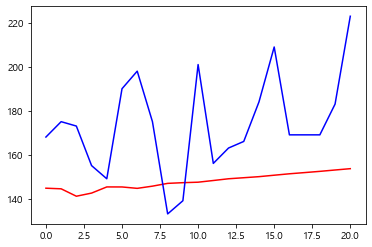

In [35]:
plt.plot(pred_y,color='red') #에측값
plt.plot(test_y,color='blue') #실제값

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

rmse=sqrt(mean_squared_error(pred_y,test_y))
print(rmse)

33.24201534754994


# --------------------------------------------------------------------------------------------------------------

In [7]:
from fbprophet import Prophet

In [8]:
train.columns=['ds','y']
test.columns=['ds','y']

In [9]:
train=train[(train['ds']>='2018-01-02')&(train['ds']<='2018-03-30')]
test=test[(test['ds']>='2018-04-02')&(test['ds']<='2018-04-30')]

In [10]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [29]:
future_data = prophet.make_future_dataframe(periods = 21, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(21)

In [12]:
# fig1=prophet.plot(forecast_data)

In [30]:
a

,ds,yhat,yhat_lower,yhat_upper
61,2018-03-31,124.611530,111.289613,136.592749
62,2018-04-01,124.065130,109.807286,138.218885
63,2018-04-02,162.763771,143.583425,180.600818
64,2018-04-03,146.404670,125.097197,167.651805
65,2018-04-04,142.472545,112.160753,171.081168
66,2018-04-05,129.087987,92.739323,166.581002
67,2018-04-06,150.078806,97.420436,204.892851
68,2018-04-07,120.786724,67.242580,171.960315
69,2018-04-08,120.240323,57.951609,183.612210
70,2018-04-09,157.723726,59.017797,255.152225


In [13]:
pred_y=a.yhat.values[0:21]
test_y=test.y.values[0:21]

In [28]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 61 to 81
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          21 non-null     datetime64[ns]
 1   yhat        21 non-null     float64       
 2   yhat_lower  21 non-null     float64       
 3   yhat_upper  21 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 804.0 bytes


In [27]:
a

,ds,yhat,yhat_lower,yhat_upper
61,2018-03-31,124.611530,112.480630,137.365156
62,2018-04-01,124.065130,110.599004,138.918567
63,2018-04-02,162.763771,144.439859,181.102065
64,2018-04-03,146.404670,124.516034,168.377269
65,2018-04-04,142.472545,111.411942,173.351071
66,2018-04-05,129.087987,94.230309,166.353877
67,2018-04-06,150.078806,98.435174,201.370775
68,2018-04-07,120.786724,68.281098,173.807756
69,2018-04-08,120.240323,56.351123,184.536552
70,2018-04-09,157.723726,57.972130,257.936320


In [15]:
pred_ds=a.ds[0:21]

In [19]:
pred_ds

61   2018-03-31
62   2018-04-01
63   2018-04-02
64   2018-04-03
65   2018-04-04
66   2018-04-05
67   2018-04-06
68   2018-04-07
69   2018-04-08
70   2018-04-09
71   2018-04-10
72   2018-04-11
73   2018-04-12
74   2018-04-13
75   2018-04-14
76   2018-04-15
77   2018-04-16
78   2018-04-17
79   2018-04-18
80   2018-04-19
81   2018-04-20
Name: ds, dtype: datetime64[ns]

In [14]:
pred_y #2020년도의 에측값

array([124.61153043, 124.06512954, 162.76377113, 146.40467036,
       142.47254497, 129.08798719, 150.0788063 , 120.78672406,
       120.24032316, 157.72372646, 141.8510482 , 138.02144615,
       125.03696588, 145.34784453, 116.96191768, 116.41551679,
       152.68368179, 137.29742604, 133.57034733, 120.98594458,
       140.61688277])

In [21]:
test_y #2020년도의 실제값


array([168, 175, 173, 155, 149, 190, 198, 175, 133, 139, 201, 156, 163,
       166, 184, 209, 169, 169, 169, 183, 223], dtype=int64)

In [22]:
test

,ds,y
61,2018-04-02,168
62,2018-04-03,175
63,2018-04-04,173
64,2018-04-05,155
65,2018-04-06,149
66,2018-04-09,190
67,2018-04-10,198
68,2018-04-11,175
69,2018-04-12,133
70,2018-04-13,139


In [ ]:
plt.plot(pred_y,color='red') #에측값
plt.plot(test_y,color='blue') #실제값

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(pred_y,test_y))
print(rmse)

46.83921176781041
